# NumPy -  Multidimensional Arrays

The numpy module is an extremely powerful package for dealing with numerical calculations.  At its core it provides a way for users to create and manipulate N-dimensional arrays.  It also provides a number of mathematical functions (e.g. exponential and trigonometric functions) and solvers (e.g. FFTW).

More importantly, these arrays behave much like arrays in C, C++, and Fortran:

* Arrays have a fixed size at creation (no dynamic growth)
* Homogenous datatype (e.g. all floats).  Means known, fixed memory size     for array
* Contiguous in memory (improved performance)

These features allow for better performance, while still maintaining the flexiblity and ease of use of Python.

To get started, we'll import the NumPy module:

In [1]:
import numpy as np

## Creating NumPy Arrays

You can initialise NumPy arrays in a variety of ways:

* Python lists and tuples
* NumPy functions (`arange`, `zeros`, etc.)
* Input data from files

### Lists/tuples

In [2]:
# vector example
x = np.array([1,2,3,4])
x

array([1, 2, 3, 4])

In [3]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

We can inspect the type of the arrays:

In [4]:
type(x), type(A)

(numpy.ndarray, numpy.ndarray)

If we want to know more about the dimensions of our arrays, we can use the `size` and `shape` functions:

In [5]:
x.shape

(4,)

In [6]:
A.shape

(2, 2)

In [7]:
A.size

4

Note that these functions are acutally called as `ndarray.size` and `ndarray.shape`.  They are functions available to ndarray objects via the NumPy module.  Equivalently, you can call the same functions directly from the NumPy module:

In [8]:
np.shape(A)

(2, 2)

These arrays look very much like Python lists...so why not just use a list for computation?  Python is great with lists, why do we need a new datatype?

Performance.

As mentioned in the slides, Python lists are dynamically typed, have an inefficient memory layout (at least for numerical computations), and don't support common array operations like dot products.

NumPy arrays only support certain datatypes:

In [9]:
A[0,0] = "Brian"

ValueError: invalid literal for int() with base 10: 'Brian'

In [10]:
A.dtype

dtype('int64')

Supported datatypes include `int`, `float`, `complex`, `bool`, Python objects, and more.  We can even set bit size for these:

In [11]:
B = np.array([[1,3],[2,4]], dtype=complex)
B

array([[ 1.+0.j,  3.+0.j],
       [ 2.+0.j,  4.+0.j]])

#### A note on memory layout

We've mentioned that NumPy stores arrays in contiguous memory.  But what does that mean, and how does it apply to multi-dimensional arrays?  Simply, a multidimensional array is actually "streteched out" and stored in memory as a long, 1D array.  There are a few ways we can "strectch" our arrays, and they're known as ***row major*** and ***column major*** order:

<img src="../img/rowcolumnarrays.jpg" style="height:350px">

Why does this matter?

Imagine we traverse this 2D array in a for loop, and assume it's stored in row major form, where `n` is the number of rows and `m` is the number of columns.  What happens if we access the code like this?

`for j in 0:m
    for i in 0:n
        A[i][j] += x[i]`

The problem is we'll be jumping around in memory, destroying our performance.  Modern compilers try to pull in contiguous blocks of data from RAM, and put them in cache (smaller, but faster, regions of memory closer to the CPU).  This staging process provides a LOT of performance, and choosing the wrong storage format (or using the wrong indices) will destroy your performance.

By default, NumPy stores arrays in row major order:

In [12]:
A = np.random.rand(3,3)
A.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

The hint here is ***C_CONTIGUOUS***.  Traditionally, C/C++ store data in row major form, and Fortran stores it in colum major form.  The convention carries over still today, and so Python denotes row major as `C` and column major as `F`

Python actually allows you to change the order (if you want):

In [13]:
A = np.random.rand(3,3)
A = np.asfortranarray(A)
A.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

### Functions

Generally we don't manually set up the elements of an array; instead we can use built-in functions to generate arrays.

#### arange

In [14]:
# start, stop, step size
x = np.arange(0, 5, 1)  
x

array([0, 1, 2, 3, 4])

In [15]:

x = np.arange(-1, 1, 0.2)  
x

array([ -1.00000000e+00,  -8.00000000e-01,  -6.00000000e-01,
        -4.00000000e-01,  -2.00000000e-01,  -2.22044605e-16,
         2.00000000e-01,   4.00000000e-01,   6.00000000e-01,
         8.00000000e-01])

#### mgrid
Similar to `meshgrid` in MATLAB, it generates 2 arrays where the values correspond to the indices.

In [16]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [17]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

#### rand

NumPy also allows you to generate random numbers:

In [18]:
# Generates uniform range of numbers in [0,1]
A = np.random.rand(3,3)
A

array([[ 0.04588462,  0.72670732,  0.80425455],
       [ 0.16950618,  0.78339021,  0.2702149 ],
       [ 0.09608814,  0.73491575,  0.20921814]])

#### zeros and ones

In [19]:
x = np.zeros(3)
x

array([ 0.,  0.,  0.])

In [20]:
x = np.ones((5,5))
x

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

### I/O

We can read in CSV data into a NumPy array as well.  We'll use some example temperature data along with the `genfromtxt` function:

In [21]:
!head ../example_data/temp_data.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [22]:
import numpy as np
data = np.genfromtxt('../example_data/temp_data.dat')

In [23]:
data.shape

(77431, 7)

Text(0,0.5,'Temperature (C)')

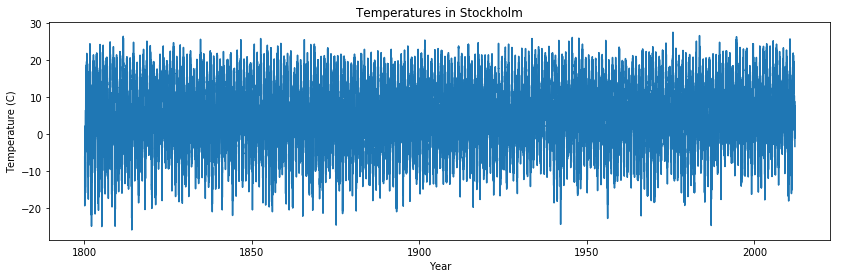

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('Temperatures in Stockholm')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')

We can also write out CSV files from NumPy arrays:

In [25]:
A = np.random.rand(5,5)
A

array([[ 0.52761253,  0.0585264 ,  0.78592941,  0.59133946,  0.91287094],
       [ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524],
       [ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619],
       [ 0.16028771,  0.72803993,  0.68082753,  0.72286634,  0.38589249],
       [ 0.66004865,  0.39766882,  0.14197249,  0.37145455,  0.28464592]])

In [26]:
np.savetxt("../example_data/rand_mat.csv",A)
!head ../example_data/rand_mat.csv

5.276125277469756458e-01 5.852639854391672447e-02 7.859294084635929378e-01 5.913394592417030582e-01 9.128709399484491449e-01
1.733097344209938440e-01 1.551208999173048220e-03 8.751146446849970006e-01 3.073698679258969335e-01 6.756652397421933909e-01
9.673539086641746998e-02 5.040567026307212206e-01 3.535058058407177795e-01 8.889817187383489694e-01 4.145561948781411044e-01
1.602877100433819368e-01 7.280399334509065623e-01 6.808275253727570364e-01 7.228663423060370796e-01 3.858924853574293712e-01
6.600486476593631080e-01 3.976688154311547319e-01 1.419724857061215317e-01 3.714545501365156266e-01 2.846459151499439733e-01


In [27]:
# Let's specify a file format
np.savetxt("../example_data/rand_mat.csv", A, fmt='%.3f')
!cat ../example_data/rand_mat.csv

0.528 0.059 0.786 0.591 0.913
0.173 0.002 0.875 0.307 0.676
0.097 0.504 0.354 0.889 0.415
0.160 0.728 0.681 0.723 0.386
0.660 0.398 0.142 0.371 0.285


## Manipulating arrays: indexing

Indexing arrays in NumPy is done via square brackets:

In [28]:
A[1,1]

0.0015512089991730482

In [29]:
A[1][1]

0.0015512089991730482

With multi-dimensional arrays, if you omit an index it will show the whole row:

In [30]:
A[1]

array([ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524])

Assigning values works the same:

In [31]:
A[0,0] = 0.5
A

array([[ 0.5       ,  0.0585264 ,  0.78592941,  0.59133946,  0.91287094],
       [ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524],
       [ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619],
       [ 0.16028771,  0.72803993,  0.68082753,  0.72286634,  0.38589249],
       [ 0.66004865,  0.39766882,  0.14197249,  0.37145455,  0.28464592]])

We can also use `:` to access all elements in a row or column (array slicing):

In [32]:
A[1,:]

array([ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524])

In [33]:
A[:,1]

array([ 0.0585264 ,  0.00155121,  0.5040567 ,  0.72803993,  0.39766882])

In [34]:
A[0,:] = 1
A

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524],
       [ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619],
       [ 0.16028771,  0.72803993,  0.68082753,  0.72286634,  0.38589249],
       [ 0.66004865,  0.39766882,  0.14197249,  0.37145455,  0.28464592]])

In [35]:
# Slice out several columns of A
cols = A[:,[0,2]]
cols

array([[ 1.        ,  1.        ],
       [ 0.17330973,  0.87511464],
       [ 0.09673539,  0.35350581],
       [ 0.16028771,  0.68082753],
       [ 0.66004865,  0.14197249]])

***Note:*** These slices aren't copies...they just point to the original array

In [36]:
# A before we modify it
A

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524],
       [ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619],
       [ 0.16028771,  0.72803993,  0.68082753,  0.72286634,  0.38589249],
       [ 0.66004865,  0.39766882,  0.14197249,  0.37145455,  0.28464592]])

In [37]:
# Pull out row 3 from A
test_row = A[3,:]
test_row

array([ 0.16028771,  0.72803993,  0.68082753,  0.72286634,  0.38589249])

In [38]:
# Zero out the row
test_row[:] = 0
test_row

array([ 0.,  0.,  0.,  0.,  0.])

In [39]:
# Print A
A

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.17330973,  0.00155121,  0.87511464,  0.30736987,  0.67566524],
       [ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.66004865,  0.39766882,  0.14197249,  0.37145455,  0.28464592]])

If we want an explicit copy, we can use the `copy` function:

In [40]:
test_row = A[2,:]
copyrow = test_row.copy()
copyrow

array([ 0.09673539,  0.5040567 ,  0.35350581,  0.88898172,  0.41455619])

## Linear algebra

NumPy allows for us for to do common operations like matrix-vector multiplication, scalar multiplications, dot products, etc.  These operations are so important to computation that entire libraries have been developed and optimized just to handle things like `a*x+y` or `A*B=C` (e.g. BLAS, LAPACK, MKL, etc.).  NumPy is able to provide performant versions of these operations via something called ***ufuncs*** (universal functions).  Ufuncs provide a convenient interface to ***vectorized*** routines in compiled libraries.

<img src="../img/vectorize.jpg" style="height:350px">

In [41]:
def compute_square(vals):
    sq_vals = np.zeros(len(vals))
    for i in range(len(vals)):
        sq_vals[i] = vals[i] * vals[i]
    return sq_vals

compute_square(np.random.randint(1, 10, size=5))

array([ 64.,  64.,  64.,  36.,  81.])

In [42]:
big_array = np.random.randint(1, 100, size=10000000)
%timeit compute_square(big_array)

3.18 s ± 317 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Imagine you have a 2D grid of points, ~3000 points in each direction....if you have to compute a square for each value (which is not an uncommon operation) you'll be waiting several seconds to do this.  Now imagine you have to this several thousand (or million) times in a simulation.  As we've mentioned earlier, the delay is not the multiplication operation itself, but rather all of the type checking and dynamic lookups the Python interpreter has to do.

Now let's try a ufunc:

In [43]:
%timeit np.square(big_array)

32.7 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Massive difference.

### Element-wise Operations

In [44]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
# Scalar addition
x+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [46]:
# Exponentiation
2**x

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [47]:
# Division
a = np.random.randint(1,100,size=10000)
b = np.random.randint(1,100,size=10000)

%timeit c = a / b

33.2 µs ± 712 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that each of these operations is simply a wrapper around a specific NumPy function:

| Operation | NumPy Function | Action |
| --- | --- | --- |
| `+` | `np.add` | Addition (e.g., 1 + 1 = 2) |
|`-`|`np.subtract`|Subtraction (e.g., 3 - 2 = 1)|
|`-`|`np.negative`|Unary negation (e.g., -2)|
|`*`|`np.multiply`|Multiplication (e.g., 2 * 3 = 6)|
|`/`|`np.divide`|Division (e.g., 3 / 2 = 1.5)|
|`//`|`np.floor_divide`|Floor division (e.g., 3 // 2 = 1)|
|`**`|`np.power`|Exponentiation (e.g., 2 ** 3 = 8)|
|`%`|`np.mod`|Modulus/remainder (e.g., 9 % 4 = 1)|

### Dot product
Be careful if you're trying to do things like dot products.  Remember, the above functions are **element-wise** operations:

In [48]:
a.shape

(10000,)

In [49]:
b.shape

(10000,)

In [50]:
a * b

array([5621,  845,  210, ..., 1748, 4950, 2349])

Normally, we'd expect a scalar value (remember, a dot product between vectors produces a scalar value).  We can do this with the `dot` function:

In [51]:
np.dot(a, b)

25005446

In [52]:
# Example with matrices
A = np.random.randint(1,10,size=(5,5))
B = np.random.randint(1,10,size=(5,5))

# Matrix-vector product
x = np.random.rand(5)
np.dot(A,x)

array([  7.44469988,   9.9789731 ,  17.5202242 ,  12.76735955,  13.30001513])

In [53]:
np.dot(A,B)

array([[ 80,  96,  85,  84, 115],
       [ 76,  72,  84,  78, 127],
       [166, 146, 149, 171, 217],
       [103,  83, 122, 103, 161],
       [129, 107,  98, 136, 152]])

We can also cast these arrays as matrices, using the `matrix` function.  This lets us use the arithmetic operators for **matrix algebra**:

In [54]:
# Cast a new matrix
M = np.matrix(A)

# Create a column vector
# Note: T is the transpose operator
v = np.matrix(x).T

M * v

matrix([[  7.44469988],
        [  9.9789731 ],
        [ 17.5202242 ],
        [ 12.76735955],
        [ 13.30001513]])

### Matrix Computations

NumPy's `linalg` module provides a range of common operations for computing things like inverses, norms, eigenvalues, decompositions, and even basic linear solvers.

#### Inverse

In [55]:
np.linalg.inv(A)

array([[ 0.42537313, -0.00746269, -1.20149254,  0.5       ,  0.90298507],
       [-0.34328358, -0.13432836,  0.97313433, -0.2       , -0.74626866],
       [-0.26119403, -0.2761194 ,  0.94477612, -0.3       , -0.58955224],
       [-0.3358209 ,  0.21641791,  1.44328358, -0.7       , -1.18656716],
       [ 0.23880597,  0.2238806 , -1.15522388,  0.4       ,  0.91044776]])

In [56]:
# Equivalent matrix function
C = np.matrix(A)

C.I

matrix([[ 0.42537313, -0.00746269, -1.20149254,  0.5       ,  0.90298507],
        [-0.34328358, -0.13432836,  0.97313433, -0.2       , -0.74626866],
        [-0.26119403, -0.2761194 ,  0.94477612, -0.3       , -0.58955224],
        [-0.3358209 ,  0.21641791,  1.44328358, -0.7       , -1.18656716],
        [ 0.23880597,  0.2238806 , -1.15522388,  0.4       ,  0.91044776]])

Just to check:

In [57]:
I_mat = C.I * C
np.set_printoptions(precision=1)

print(I_mat)

[[  1.0e+00   4.4e-16  -4.4e-16   0.0e+00  -1.8e-15]
 [  1.1e-16   1.0e+00   1.4e-15  -4.4e-16   2.7e-15]
 [ -5.6e-16  -1.1e-16   1.0e+00   4.4e-16   1.8e-15]
 [ -8.9e-16  -2.2e-16   0.0e+00   1.0e+00   0.0e+00]
 [  1.1e-15   2.2e-16  -6.7e-16   1.3e-15   1.0e+00]]


#### Determinants

In [58]:
np.linalg.det(C)

-670.00000000000057

#### Eigenvalues

In [59]:
w,v = np.linalg.eig(A)
w

array([ 25.1,   6.6,  -2.5,   0.9,   1.8])

In [60]:
v

array([[-0.3, -0.7, -0.4, -0.5, -0.5],
       [-0.3,  0.2, -0.3,  0.5,  0.5],
       [-0.6,  0.3,  0. ,  0.3,  0.1],
       [-0.3, -0.1,  0.9,  0.6,  0.6],
       [-0.5,  0.6, -0.2, -0.4, -0.2]])

Returns an object with 2 arrays: the first array are the eigenvalues, and the second array is composed of the eigenvectors (normalised).

Note that the `ith` column of v (`v[:,i]`) corresponds to the `ith` eigenvalue of w (`w[i]`)

#### Norms

NumPy provides a lot of different norms to choose from:

In [61]:
# 2-norm for vectors
np.linalg.norm(x)

1.3059824312235981

In [62]:
# 2-norm for matrices (aka Frobenius)
np.linalg.norm(A)

28.035691537752374

In [63]:
# Infinity norm for vectors
np.linalg.norm(x,np.inf)

0.9880686628855031

In [64]:
# Negative infinity norm for matrices
np.linalg.norm(A, -np.inf)

18.0

#### Max and Min

In [65]:
A.min()

1

In [66]:
A

array([[9, 1, 4, 5, 1],
       [4, 3, 2, 4, 5],
       [9, 4, 9, 6, 8],
       [7, 7, 2, 3, 4],
       [5, 1, 9, 4, 8]])

In [67]:
x.max()

0.9880686628855031

## Reshaping Arrays

NumPy has methods for quickly and efficiently manipulating arrays that don't involve making a copy of the data (which would greatly impact performance)

In [68]:
A

array([[9, 1, 4, 5, 1],
       [4, 3, 2, 4, 5],
       [9, 4, 9, 6, 8],
       [7, 7, 2, 3, 4],
       [5, 1, 9, 4, 8]])

In [69]:
n, m = A.shape

# Flatten the matrix into an n*m 1D array
B = A.reshape((1,n*m))
B

array([[9, 1, 4, 5, 1, 4, 3, 2, 4, 5, 9, 4, 9, 6, 8, 7, 7, 2, 3, 4, 5, 1,
        9, 4, 8]])

Let's alter the array:

In [70]:
B[0,0:10] = 0
B

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 4, 9, 6, 8, 7, 7, 2, 3, 4, 5, 1,
        9, 4, 8]])

In [71]:
A

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [9, 4, 9, 6, 8],
       [7, 7, 2, 3, 4],
       [5, 1, 9, 4, 8]])

Original values in A were changed...B is simply a pointer to A

There are situations where you want to reshape and make a copy.  In that case, you can use the `flatten` function:

In [72]:
B = A.flatten()
B[0,0:10] = -1

IndexError: too many indices for array

In [73]:
B[0:10] = -1
B

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  9,  4,  9,  6,  8,  7,  7,
        2,  3,  4,  5,  1,  9,  4,  8])

In [74]:
A

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [9, 4, 9, 6, 8],
       [7, 7, 2, 3, 4],
       [5, 1, 9, 4, 8]])

## Final Thoughts

NumPy's power comes from being able to couple Python's convenience with the speed of compiled libraries.  It should be your starting point for (just about) any HPC Python development work.

* Vectorise, vectorise, vectorise!
* You probably don't need to write a new function or solver (someone likely has, and done it better already)
* Give thought to your data structures...they affect performance